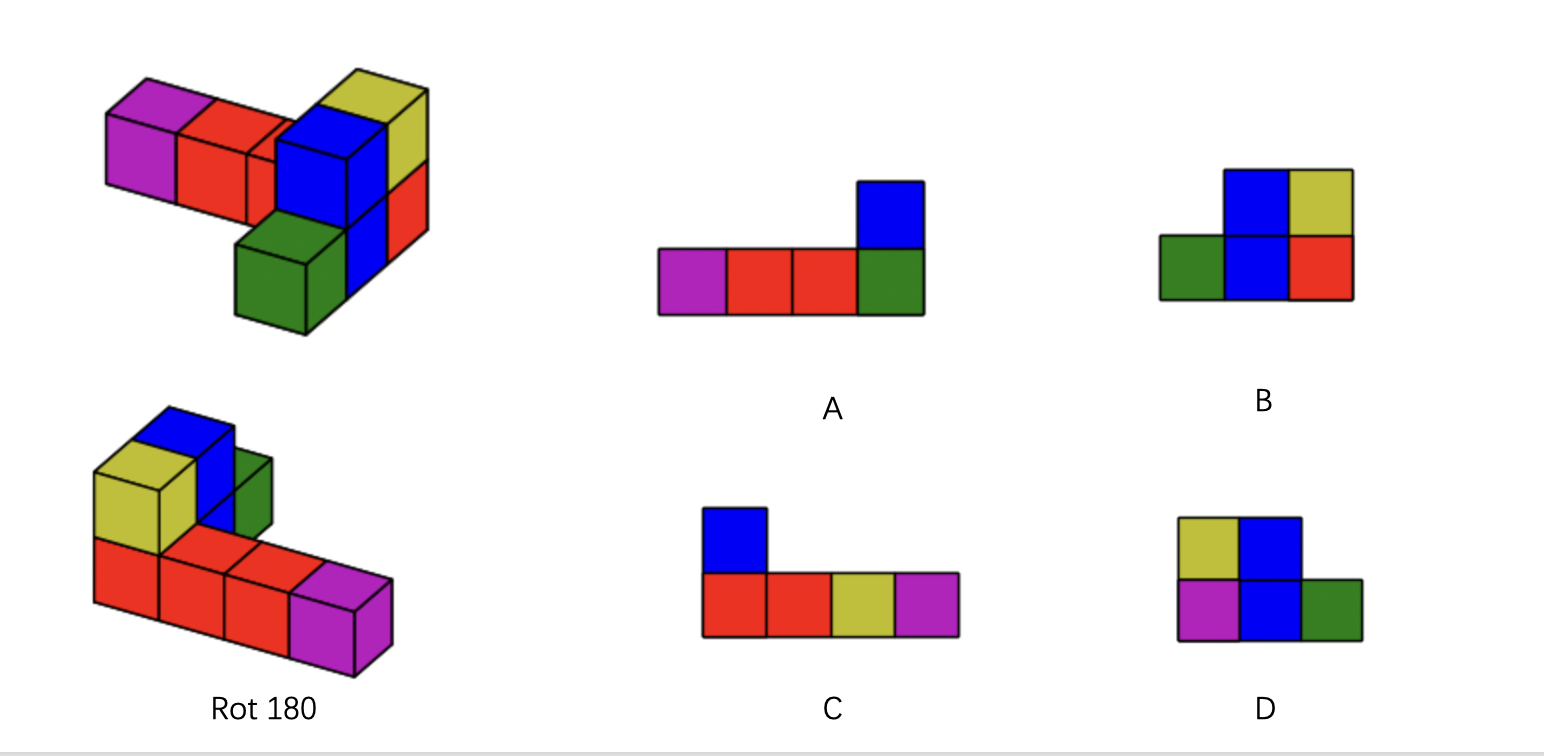

Type in the letter of the answer here:  C


Time taken: 3.54 seconds
Well done! points+1


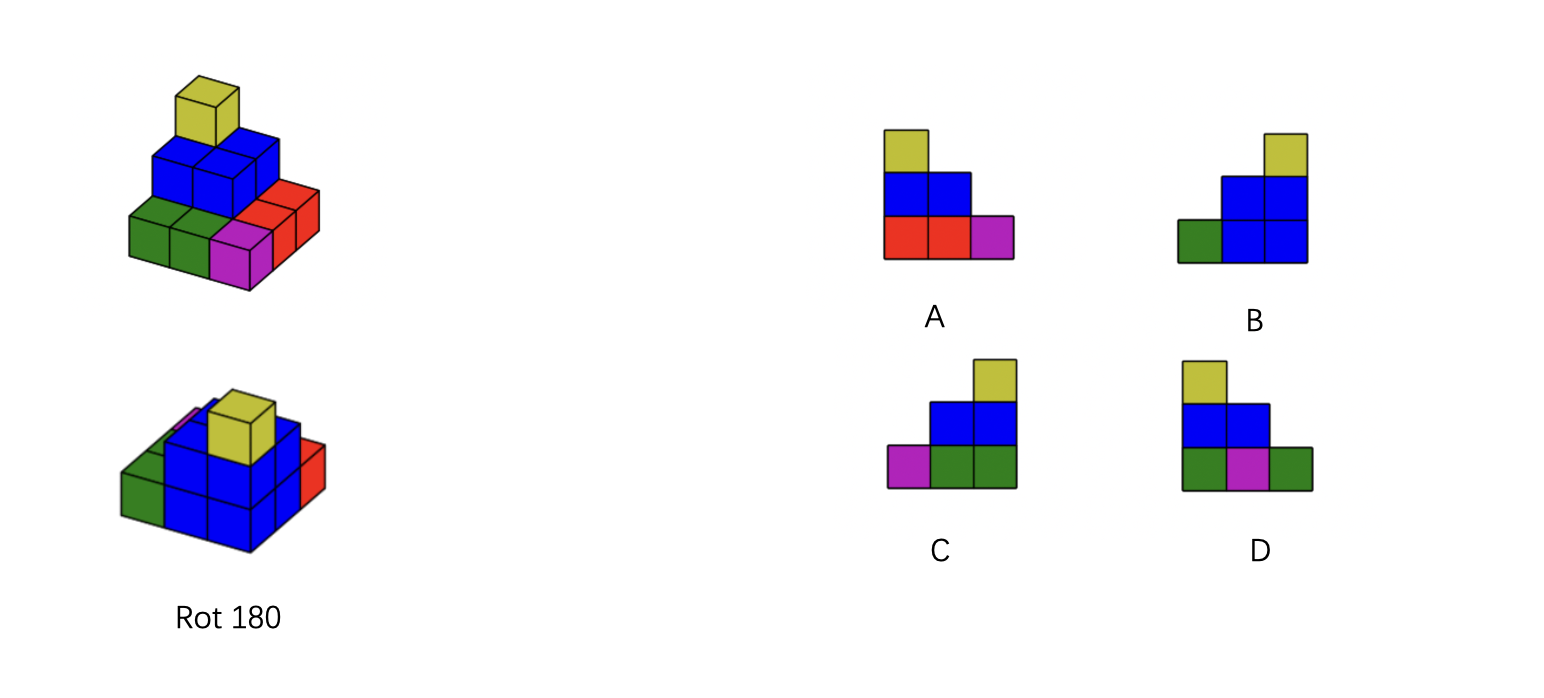

Type in the letter of the answer here:  D


Time taken: 1.62 seconds
Well done! points+2


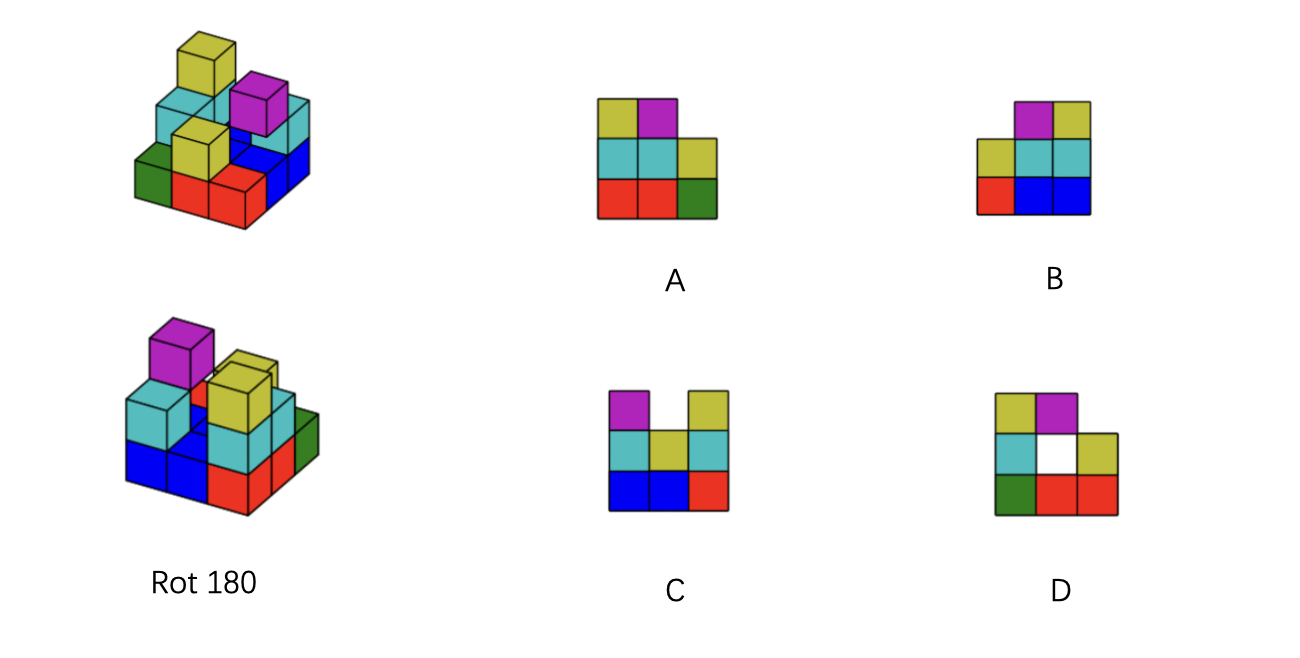

Type in the letter of the answer here:  D


Time taken: 2.81 seconds
Well done! points+3


In [2]:
import time #for delaying the appearance of outputs
from IPython.display import display, HTML, Image #for being able to have highlighted, emphasized output
from IPython.display import clear_output #To clear off previous user input and instructions
Shown_Image2=Image("test image.png", width=600)#uploading the image, one for each question
Shown_Image1=Image("test image 2.png", width=600)
Shown_Image3=Image("test image 3.png", width=600)
points=0#variable to count points
total_time = 0 #variable to record time needed by user to do question

def q1 (Shown_Image1):
    display(Shown_Image1) #show the question
    global points #globalize variable so we can work out a total at the end for all questions
    global total_time
    start_time = time.time() 
    answer1 = input("Type in the letter of the answer here: ")
    end_time = time.time()
    time_taken = end_time - start_time
    total_time += time_taken #calculating time taken for user to submit something
    print("Time taken:", round(time_taken, 2), "seconds") #print off variables for user to see
    while True:
                if answer1 == "C": #if input is correct
                    points += 1
                    print("Well done!", "points+1")
                    return  # End the function after correct answer
                else: #if input is wrong
                    print("You got it wrong", "points+0",)
                    return  # End the function after incorrect answer
def q2 (Shown_Image2):
    display(Shown_Image2)
    global points
    global total_time
    start_time = time.time()
    answer2 = input("Type in the letter of the answer here: ")
    end_time = time.time()
    time_taken = end_time - start_time
    total_time += time_taken
    print("Time taken:", round(time_taken, 2), "seconds")
    while True:
                if answer2 == "D":
                    points += 2
                    print("Well done!", "points+2",)
                    return  # End the function after correct answer
                else:
                    print("You got it wrong", "points+0")
                    return  # End the function after incorrect answer
def q3 (Shown_Image3):
    display(Shown_Image3)
    global points
    global total_time
    start_time = time.time()
    answer3 = input("Type in the letter of the answer here: ")
    end_time = time.time()
    time_taken = end_time - start_time
    total_time += time_taken
    print("Time taken:", round(time_taken, 2), "seconds")
    while True:
                if answer3 == "D":
                    points += 3
                    print("Well done!", "points+3")
                    return  # End the function after correct answer
                else:
                    print("You got it wrong", "points+0")
                    return  # End the function after incorrect answer






print("welcome to spatial reasoning test!")
time.sleep(2)
clear_output(wait=False)

data_consent_info = """DATA CONSENT INFORMATION:

Before we begin, Please read:

We wish to record your response data
to an anonymised public data repository. 
Your data will be used for educational teaching purposes
practising data analysis and visualisation.

Please type   yes   in the box below if you consent to the upload."""

print(data_consent_info)
result = input() 
clear_output(wait=False)

if result == "yes": 
    print("Thanks for your participation.")
    print("Please contact a.fedorec@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
    
    
else: 
    # end code execution by raising an exception
    raise(Exception("User did not consent to continue test."))

time.sleep(5)
clear_output(wait=False)
id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:
- two letters based on the initials (first and last name) of a childhood friend
- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise
     then your unique identifier would be CBTC
"""

print(id_instructions)
user_id = input(">")
clear_output(wait=False)

gender=input("What is your gender?")
clear_output(wait=False)
geographic_background=input("which continent are you from")
clear_output(wait=False)
print("You are going to be shown a 3d image of colored cubes")
time.sleep(4)
clear_output(wait=False)
print("You should then identify a 2d projection which cannot be made by rotating this arrangement this space")
time.sleep(6)
clear_output(wait=False)
while True:
    response = input("Press Enter when you are ready to begin...")
    if response == "":
        clear_output(wait=True)
        q1(Shown_Image1)
        q2(Shown_Image2)
        q3(Shown_Image3)
        time.sleep(2)
        html_output = f"""
        <p>Thank you for completing the test!</p>
        <p><span style="color: red; font-size: larger;">Total points: {points}</span></p>
        <p><span style="color: red; font-size: larger;">Total time: {total_time} seconds</span></p>
         """
        display(HTML(html_output))
        break
    else:
        print("Invalid response. Please press Enter to begin.")

In [ ]:
import requests
from bs4 import BeautifulSoup
import json 

In [ ]:
#The following function uploads the data I collected to google form. The function
#takes two inputs, one is my data in form of dictionary, other one is the location
#of the set up google form
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

data_dict = {'user_id': user_id, 'gender': gender, 'geographic_background': geographic_background, 'points': points, 'total_time': total_time}
form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSeABVvLf2SaQY0vDF7mxe2mTqdBoqvi-y9a2SYZBt-oql7vjw/viewform'
send_to_google_form(data_dict, form_url)

In [5]:
#The following is an exmaple of how images I have used in the test are generated,
#Here I have put the code of generation of cubes in question 1

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
def draw_cubes(cubes, ticks=False, grid=False, view='', flip='', rot=0, ax3d=None):
    
    # create empty cube
    cubes_to_draw = np.zeros(cubes.shape)
    
    # set elements to 1 where colour is not empty
    cubes_to_draw[cubes!=''] = 1

    # make figure and 3d axes for plotting
    if ax3d is None:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d', proj_type='ortho', box_aspect=(4,4,4))
    else:
        ax = ax3d
        
    nx, ny, nz = cubes.shape

    ax.axes.set_xlim3d(0, nx) 
    ax.axes.set_ylim3d(0, ny) 
    ax.axes.set_zlim3d(0, nz) 

    # The cubes can be plotted using a 3D voxels plot
    ax.voxels(cubes_to_draw, facecolors=cubes, edgecolors='k', shade=False);

    # view argument allows users to set a 2D projection
    if view == 'xy': ax.view_init(90, -90, 0+rot)
    elif view == '-xy': ax.view_init(-90, 90, 0-rot)
    elif view == 'xz': ax.view_init(0, -90, 0+rot)
    elif view == '-xz': ax.view_init(0, 90, 0-rot)
    elif view == 'yz': ax.view_init(0, 0, 0+rot)
    elif view == '-yz': ax.view_init(0, 180, 0-rot)
    else:   ax.view_init(azim=ax.azim+rot)

    # flip argument allows user to show a mirror image
    # flip='x' reverses image in x direction etc.
    if 'x' in flip: ax.axes.set_xlim3d(nx, 0) 
    if 'y' in flip: ax.axes.set_ylim3d(ny, 0) 
    if 'z' in flip: ax.axes.set_zlim3d(nz, 0) 

    # style figure ticks and grid lines
    if ticks==False: 
        for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
            axis.set_ticklabels([])
            axis.line.set_linestyle('')
            axis._axinfo['tick']['inward_factor'] = 0.0
            axis._axinfo['tick']['outward_factor'] = 0.0
            
    if grid==False and ticks==False: ax.set_axis_off()
    
    if ax3d is not None:
        # return axes with result
        return
    else:
        # show image
        display(fig)

        # delete figure
        plt.close(fig)

    return

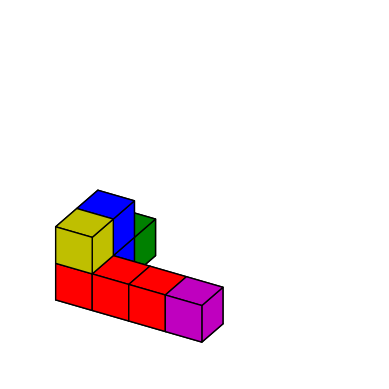

In [6]:
# define a 5 x 5 x 5 cube space

# to draw a cube in the space
# we set the entry to a colour

# allowed colours:
#
# r - red,     g - green, b - blue, 
# m - magenta, c - cyan,  y - yellow
# k - black,   w - white

# define 3d 5x5x5 string array with entries set to '' 
cubes = np.full((5,5,5),'')

# construct cube arrangement 
# by inserting color codes into 3D array

cubes[0:3,0,0] = 'r' 
cubes[0,2,0] = 'g' 
cubes[0,1,0:2] = 'b' 
cubes[3,0,0] = 'm'
cubes[0,0,1] = 'y'

# draw in 3D
draw_cubes(cubes)

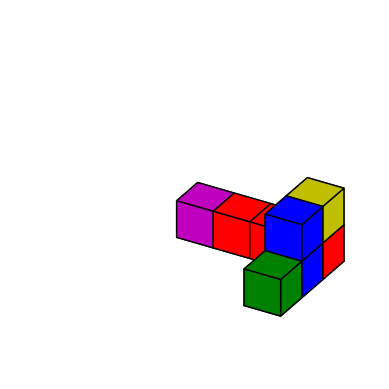

In [7]:
# draw in 3D after rotating 180
draw_cubes(cubes, rot=180)

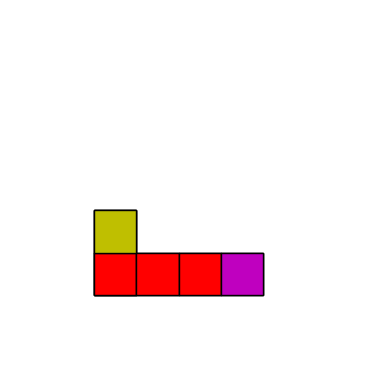

In [8]:
# draw the side view in XZ direction
draw_cubes(cubes, view='xz')

In [ ]:
# draw the side view in -XZ direction (other side)
draw_cubes(cubes, view='-xz')

In [ ]:
# draw the side view in YZ direction
draw_cubes(cubes, view='yz')

In [ ]:
# draw the side view in -YZ direction (other side)
draw_cubes(cubes, view='-yz')